In [ ]:
from numpy import asarray
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from sklearn.metrics.cluster import contingency_matrix 
from scipy.spatial import distance_matrix
from scipy.spatial import distance 

In [ ]:
data = np.array([[2,4],
                   [3,4],
                   [3,3],
                   [5,8],
                   [5,4],
                   [5,6],
                   [6,4],
                   [6,5],
                   [6,7],
                   [7,3],
                   [7,4],
                   [8,2],
                   [9,4],
                   [10,6],
                   [10,7],
                   [10,8],
                   [11,5],
                   [11,8],
                   [12,7],
                   [13,6],
                   [13,7],
                   [14,6],
                   [15,4],
                   [15,5]])
GroundTruthSet=[0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2]
k=[2,3,4,5,6]

Kmeans Visualization and Evaluation



In [ ]:
def kmeans(k):
  kmeans = KMeans(k)
  label = kmeans.fit_predict(data)
  print(label)
  Clusterlist = np.unique(label)
  Clusters=[]
  for i in Clusterlist:
      Clusters.append(data[label == i])
      plt.scatter(data[label == i,0] , data[label == i,1] , label = i) 
  plt.legend()
  plt.show()
  return label,Clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


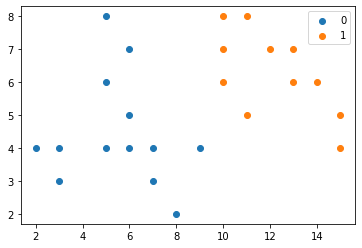

[0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1]


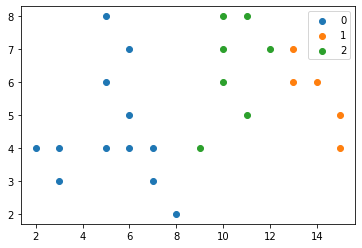

[2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3]


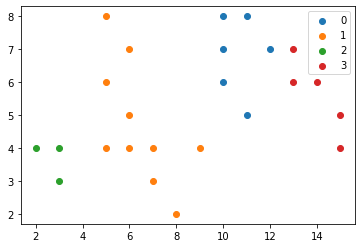

[0 0 0 3 2 3 2 2 3 2 2 2 2 1 1 1 1 1 1 4 4 4 4 4]


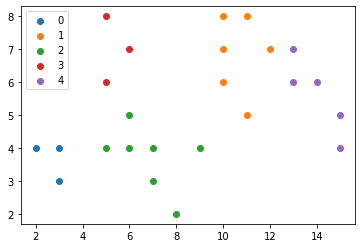

[5 5 5 4 1 4 1 1 4 3 3 3 3 0 0 0 0 0 0 2 0 2 2 2]


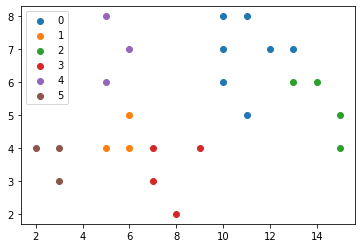

In [ ]:
ContingencyMatrix=[]
LabelsMatrix=[]
ClusterSet=[]

label2,clusters2=kmeans(2)
Contingency2=contingency_matrix(GroundTruthSet,label2).T
ContingencyMatrix.append(Contingency2)
LabelsMatrix.append(label2)
ClusterSet.append(clusters2)

label3,clusters3=kmeans(3)
Contingency3=contingency_matrix(GroundTruthSet,label3).T
ContingencyMatrix.append(Contingency3)
LabelsMatrix.append(label3)
ClusterSet.append(clusters3)     

label4,clusters4=kmeans(4)
Contingency4=contingency_matrix(GroundTruthSet,label4).T
ContingencyMatrix.append(Contingency4)
LabelsMatrix.append(label4)
ClusterSet.append(clusters4)

label5,clusters5=kmeans(5)
Contingency5=contingency_matrix(GroundTruthSet,label5).T
ContingencyMatrix.append(Contingency5)
LabelsMatrix.append(label5)
ClusterSet.append(clusters5)

label6,clusters6=kmeans(6)
Contingency6=contingency_matrix(GroundTruthSet,label6).T
ContingencyMatrix.append(Contingency6)
LabelsMatrix.append(label6)
ClusterSet.append(clusters6)

In [75]:

def purity(matrix):
     Wpurity=np.sum(np.amax(matrix, axis=1)) / np.sum(matrix) 
     print("Purity %.5f" % Wpurity)
     return Wpurity

def Fmeasure(matrix,p):
   # recall=metrics.recall_score(GroundTruthSet,labels,average='macro')
    tp_fn=comb(np.sum(matrix,axis=0),2).sum()
    tp = comb(matrix.astype(int), 2).sum()
    fn = tp_fn - tp
    recall = (tp) / (tp + fn)
    F=(2*recall*p)/(recall+p)
    print("F-measure %.5f" % F)

def pairwisemeasures(matrix):
   tp_fp=comb(np.sum(matrix,axis=1),2).sum() #true positive + false positive
   tp_fn=comb(np.sum(matrix,axis=0),2).sum()
   tp = comb(matrix.astype(int), 2).sum()
   fp = tp_fp - tp
   fn = tp_fn - tp
   tn = comb(matrix.sum(), 2) - tp - fp - fn
   print ("Rand index: %.5f" % ((tp + tn) / (tp + fp + fn + tn)))
   print ("Jaccard index: %.5f" % (tp / (tp + fp + fn )))   

def ConditionalEntropy(matrix):
    entropies=0
    for i in matrix:
      htc=0
      for j in range(len(i)):
         sum_of_cluster=np.sum(i)
         if(i[j]==0):
           continue
         else:
          htc= htc +  ( ( -i[j] /  sum_of_cluster )  * ( math.log(i[j] /  sum_of_cluster ) ) )
      h=( sum_of_cluster / np.sum(matrix) ) * htc
      entropies = entropies + h
    print("Condtional Entropy %.5f" % entropies)  

def MaxMatching(matrix):
      index=np.argmax(matrix, axis=0) #re-arranging 
      diagonal_sum=np.trace(matrix[index,:])
      value=diagonal_sum/(np.sum(matrix))
      print ("Max Matching for k=3: %.5f" % (value))


def BetaCV(clusters,k):    
    Nin=[]
    Nout=[]
    Proximitymat=np.zeros((k,k))
    for i in range(len(clusters)):
      for j in range(len(clusters)):
       if (i==j):  
           within_cluster_mat=np.sum(distance_matrix(clusters[i],clusters[i]))
           Proximitymat[i][i]=within_cluster_mat
           num_ofinner_edges=comb(len(clusters[i]),2)
           Nin.append(num_ofinner_edges)
       else:    
           between_clusters_mat=np.sum(distance_matrix(clusters[i],clusters[j]))
           Proximitymat[i][j]=between_clusters_mat   
           num_ofouter_edges=np.multiply(len(clusters[i]),len(clusters[j]))
           Nout.append(num_ofouter_edges)     
    #print("Proximity Matrix =",Proximitymat)
    Win=(np.trace(Proximitymat) ) / 2
    #print(Win)
    Wout= (np.sum(Proximitymat)-Win) /2
    #print(Wout)
    nout=np.sum(Nout)
    nin=np.sum(Nin) 
    intracluster=np.divide(Win,nin)
    #print(intracluster)
    intercluster=np.divide(Wout,nout)
    #print(intercluster)
    print ("BetaCV ratio : %.5f" % np.divide(intracluster,intercluster))

def NormalizedCut(clusters,k):
    Ncuts=[]
    Proximitymat=np.zeros((k,k))
    for i in range(len(clusters)):
      external_distance=0
      for j in range(len(clusters)):
        if (i==j):  
           within_cluster_mat=np.sum(distance_matrix(clusters[i],clusters[i]))
           Proximitymat[i][i]=within_cluster_mat
        else:    
           between_clusters_mat=np.sum(distance_matrix(clusters[i],clusters[j]))
           Proximitymat[i][j]=between_clusters_mat   
           external_distance=external_distance + between_clusters_mat
      dist=external_distance + within_cluster_mat
      ncut=np.divide(  external_distance ,dist  )
      Ncuts.append(ncut)     
    print ("Normalized Cut : %.5f" % np.sum(Ncuts))


In [76]:
for i in range(5): 
 print("for Kmeans with k=",k[i],"clusters") 
 p=purity(ContingencyMatrix[i])
 Fmeasure(ContingencyMatrix[i],p)
 pairwisemeasures(ContingencyMatrix[i])
 BetaCV(ClusterSet[i],k[i])
 NormalizedCut(ClusterSet[i],k[i])
 ConditionalEntropy(ContingencyMatrix[i])
MaxMatching(ContingencyMatrix[1])

for Kmeans with k= 2 clusters
Purity 0.87500
F-measure 0.93333
Rand index: 0.89130
Jaccard index: 0.77444
BetaCV ratio : 0.72765
Normalized Cut : 1.42794
Condtional Entropy 0.29261
for Kmeans with k= 3 clusters
Purity 0.83333
F-measure 0.71190
Rand index: 0.73913
Jaccard index: 0.47059
BetaCV ratio : 0.78279
Normalized Cut : 2.52421
Condtional Entropy 0.40078
for Kmeans with k= 4 clusters
Purity 1.00000
F-measure 0.82955
Rand index: 0.89130
Jaccard index: 0.70874
BetaCV ratio : 0.73292
Normalized Cut : 3.60684
Condtional Entropy 0.00000
for Kmeans with k= 5 clusters
Purity 1.00000
F-measure 0.67097
Rand index: 0.81522
Jaccard index: 0.50485
BetaCV ratio : 0.61632
Normalized Cut : 4.69442
Condtional Entropy 0.00000
for Kmeans with k= 6 clusters
Purity 1.00000
F-measure 0.57931
Rand index: 0.77899
Jaccard index: 0.40777
BetaCV ratio : 0.60371
Normalized Cut : 5.73474
Condtional Entropy 0.00000
Max Matching for k=3: 0.75000


KNN Graph Visualization and Evaluation

In [ ]:
def KNNgraph(k,K):
  A = kneighbors_graph(data,K, mode='connectivity',include_self=False) #adjacency matrix
  A = A.toarray()
  degree = np.diag(np.sum(A, axis=1))  
  L=np.subtract(degree,A)
  La=np.dot(np.linalg.inv(degree),L)
  eigenvalues,eignvectors=np.linalg.eigh(La)
  idx = np.argsort(eigenvalues) #ascending 
  Sorted_eigenValues= eigenvalues[idx]
  Sorted_eigenvectors= eignvectors[:,idx]
  Sorted_eigenvectors=np.real(Sorted_eigenvectors[:,0:k])
  m = preprocessing.normalize(Sorted_eigenvectors, norm='l2')  
  #print(m)
  kmeans = KMeans(k)
  label = kmeans.fit_predict(m)
  Clusterlist = np.unique(label)
  Clusters=[]
  for i in Clusterlist:
      Clusters.append(data[label == i])
      plt.scatter(data[label == i,0] , data[label == i,1] , label = i) 
  plt.legend()
  plt.show()
  return label,Clusters

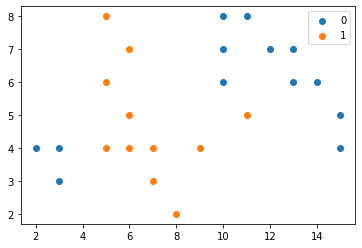

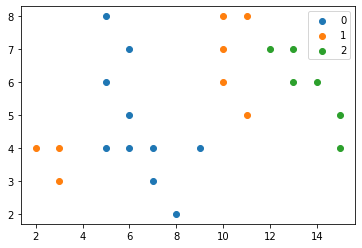

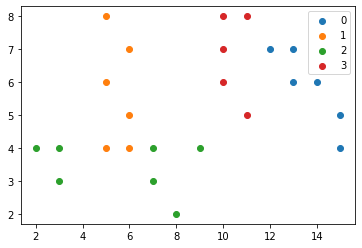

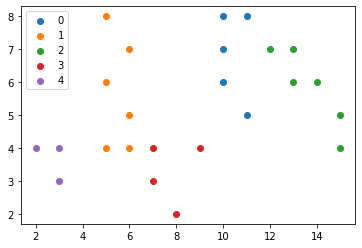

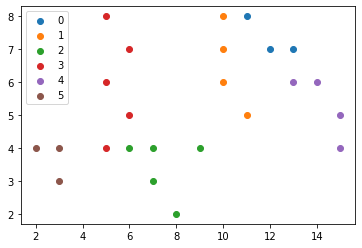

for 3NN Graph with k= 2 cuts
[0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
Purity 0.83333
F-measure 0.86673
Rand index: 0.81884
Jaccard index: 0.65035
Condtional Entropy 0.29261
BetaCV ratio : 1.15272
Normalized Cut : 1.19245
for 3NN Graph with k= 3 cuts
[1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]
Purity 0.87500
F-measure 0.78314
Rand index: 0.83696
Jaccard index: 0.61864
Condtional Entropy 0.40078
BetaCV ratio : 1.01020
Normalized Cut : 2.38931
for 3NN Graph with k= 4 cuts
[2 2 2 1 1 1 1 1 1 2 2 2 2 3 3 3 3 3 0 0 0 0 0 0]
Purity 0.87500
F-measure 0.61635
Rand index: 0.76087
Jaccard index: 0.42609
Condtional Entropy 0.00000
BetaCV ratio : 0.81567
Normalized Cut : 3.58293
for 3NN Graph with k= 5 cuts
[4 4 4 1 1 1 1 1 1 3 3 3 3 0 0 0 0 0 2 2 2 2 2 2]
Purity 1.00000
F-measure 0.64474
Rand index: 0.80435
Jaccard index: 0.47573
Condtional Entropy 0.00000
BetaCV ratio : 0.64233
Normalized Cut : 4.68846
for 3NN Graph with k= 6 cuts
[5 5 5 3 3 3 2 3 3 2 2 2 2 1 1 1 1 0 0 4 0 4 4 4]
P

In [77]:
LabelMatrix3NN=[]
ContingencyMatrix3NN=[]
ClusterSet3NN=[]

label23,cluster2=KNNgraph(2,3)
Contingency23=contingency_matrix(GroundTruthSet,label23).T
LabelMatrix3NN.append(label23)
ContingencyMatrix3NN.append(Contingency23)
ClusterSet3NN.append(cluster2)

label33,cluster=KNNgraph(3,3)
Contingency33=contingency_matrix(GroundTruthSet,label33).T
LabelMatrix3NN.append(label33)
ContingencyMatrix3NN.append(Contingency33)
ClusterSet3NN.append(cluster)

label43,cluster=KNNgraph(4,3)
Contingency43=contingency_matrix(GroundTruthSet,label43).T
LabelMatrix3NN.append(label43)
ContingencyMatrix3NN.append(Contingency43)
ClusterSet3NN.append(cluster)

label53,cluster=KNNgraph(5,3)
Contingency53=contingency_matrix(GroundTruthSet,label53).T
LabelMatrix3NN.append(label53)
ContingencyMatrix3NN.append(Contingency53)
ClusterSet3NN.append(cluster)

label63,cluster=KNNgraph(6,3)
Contingency63=contingency_matrix(GroundTruthSet,label63).T
LabelMatrix3NN.append(label63)
ContingencyMatrix3NN.append(Contingency63)
ClusterSet3NN.append(cluster)

for i in range(5):
 print("for 3NN Graph with k=",k[i],"cuts") 
 print(LabelMatrix3NN[i])
 p=purity(ContingencyMatrix3NN[i])
 Fmeasure(ContingencyMatrix3NN[i],p)
 pairwisemeasures(ContingencyMatrix3NN[i])
 ConditionalEntropy(ContingencyMatrix[i])
 BetaCV(ClusterSet3NN[i],k[i])
 NormalizedCut(ClusterSet3NN[i],k[i])
MaxMatching(ContingencyMatrix3NN[1])



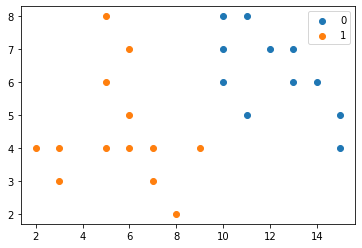

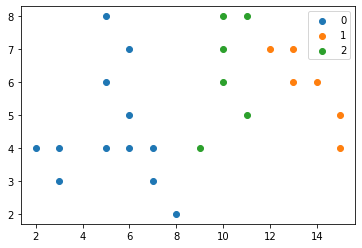

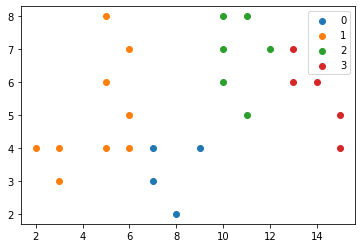

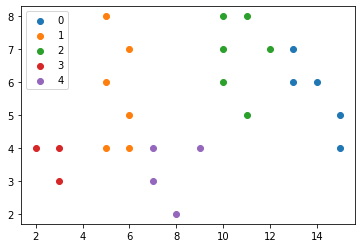

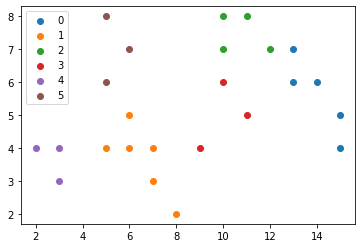

for 5NN Graph with k= 2 cuts
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
Purity 0.87500
F-measure 0.93333
Rand index: 0.89130
Jaccard index: 0.77444
Condtional Entropy 0.29261
BetaCV ratio : 1.15272
Normalized Cut : 1.19245
for 5NN Graph with k= 3 cuts
[0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1]
Purity 0.83333
F-measure 0.71190
Rand index: 0.74275
Jaccard index: 0.47407
Condtional Entropy 0.40078
BetaCV ratio : 1.01020
Normalized Cut : 2.38931
for 5NN Graph with k= 4 cuts
[1 1 1 1 1 1 1 1 1 0 0 0 0 2 2 2 2 2 2 3 3 3 3 3]
Purity 0.87500
F-measure 0.61635
Rand index: 0.73913
Jaccard index: 0.40496
Condtional Entropy 0.00000
BetaCV ratio : 0.81567
Normalized Cut : 3.58293
for 5NN Graph with k= 5 cuts
[3 3 3 1 1 1 1 1 1 4 4 4 4 2 2 2 2 2 2 0 0 0 0 0]
Purity 1.00000
F-measure 0.64474
Rand index: 0.80435
Jaccard index: 0.47573
Condtional Entropy 0.00000
BetaCV ratio : 0.64233
Normalized Cut : 4.68846
for 5NN Graph with k= 6 cuts
[4 4 4 5 1 5 1 1 5 1 1 1 3 3 2 2 3 2 2 0 0 0 0 0]
P

In [78]:
LabelMatrix5NN=[]
ContingencyMatrix5NN=[]
ClusterSet5NN=[]


label25,cluster=KNNgraph(2,5)
Contingency25=contingency_matrix(GroundTruthSet,label25).T
LabelMatrix5NN.append(label25)
ContingencyMatrix5NN.append(Contingency25)
ClusterSet5NN.append(cluster)

label35,cluster=KNNgraph(3,5)
Contingency35=contingency_matrix(GroundTruthSet,label35).T
LabelMatrix5NN.append(label35)
ContingencyMatrix5NN.append(Contingency35)
ClusterSet5NN.append(cluster)

label45,cluster=KNNgraph(4,5)
Contingency45=contingency_matrix(GroundTruthSet,label45).T
LabelMatrix5NN.append(label45)
ContingencyMatrix5NN.append(Contingency45)
ClusterSet5NN.append(cluster)

label55,cluster=KNNgraph(5,5)
Contingency55=contingency_matrix(GroundTruthSet,label55).T
LabelMatrix5NN.append(label55)
ContingencyMatrix5NN.append(Contingency55)
ClusterSet5NN.append(cluster)

label65,cluster=KNNgraph(6,5)
Contingency65=contingency_matrix(GroundTruthSet,label65).T
LabelMatrix5NN.append(label65)
ContingencyMatrix5NN.append(Contingency65)
ClusterSet5NN.append(cluster)

for i in range(5):
 print("for 5NN Graph with k=",k[i],"cuts") 
 print(LabelMatrix5NN[i])
 p=purity(ContingencyMatrix5NN[i])
 Fmeasure(ContingencyMatrix5NN[i],p)
 pairwisemeasures(ContingencyMatrix5NN[i])
 ConditionalEntropy(ContingencyMatrix[i])
 BetaCV(ClusterSet3NN[i],k[i])
 NormalizedCut(ClusterSet3NN[i],k[i])
MaxMatching(ContingencyMatrix5NN[1])